In [1]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [3]:
bank = pd.read_csv(r"C:\Users\Binita Mandal\Desktop\Assignment which are submitted for checkup\bank-full.csv", sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Colmun names in the bank:

bank.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
bank.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [6]:
bank.shape

(45211, 17)

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
bank.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [9]:
bank.isna().sum().sum()

0

In [10]:
bank.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
def column_preproceesor_function(df):
    count = 0
    for row in df:
        try:
            if type(row)!=numpy.object or type(row)!=numpy.int64 :
                df.loc[count] = np.nan  # non-integer value will be replaced by np.nan
        except:
            pass
        count +=1

In [12]:
for column in bank[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan',
                       'contact', 'day','month', 'duration', 'campaign', 'pdays','previous', 
                       'poutcome', 'y']]:
    
    column_preproceesor_function(column)

In [13]:
bank.isna().sum().sum()

0

In [14]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


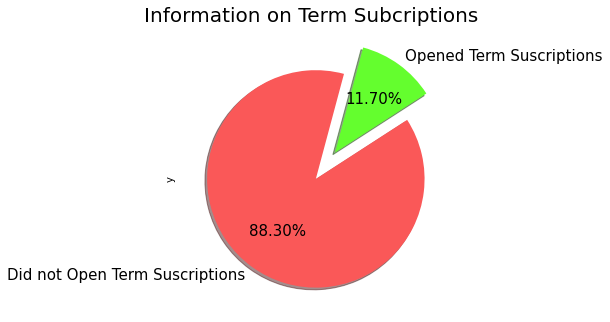

In [16]:
plt.subplots(figsize=(5,5))

#-------------------------------------------------------------------------------------------------------------------------------
colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

bank["y"].value_counts().plot.pie(explode=[0,0.3], autopct='%1.2f%%',shadow=True, 
                                     colors=colors,labels=labels, fontsize=15, startangle=75)
plt.suptitle('Information on Term Subcriptions', fontsize=20)
plt.show()

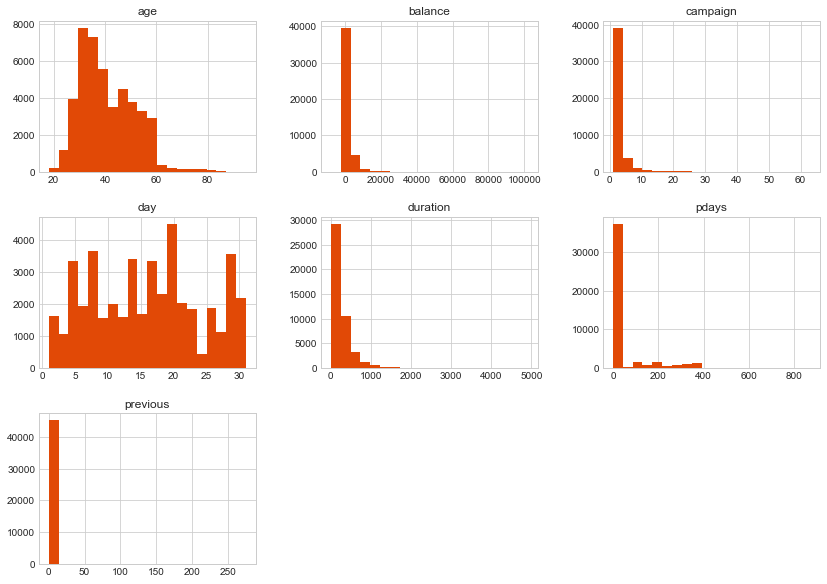

In [17]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

bank.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

# 1. Job :
# Checking counts proportions of clients acc to job.

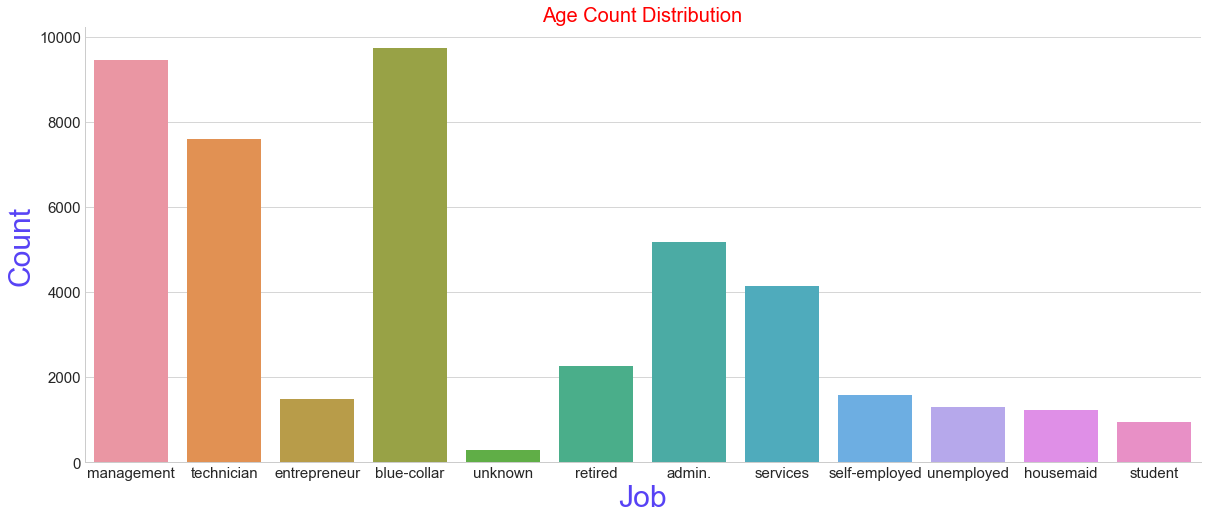

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank)
ax.set_xlabel('Job', fontsize=30, color='#5742f5')
ax.set_ylabel('Count', fontsize=30, color='#5742f5')
ax.set_title('Age Count Distribution', fontsize=20, color='red')
ax.tick_params(labelsize=15)
sns.despine()

# checking percentage of people acc to profession to term deposit.

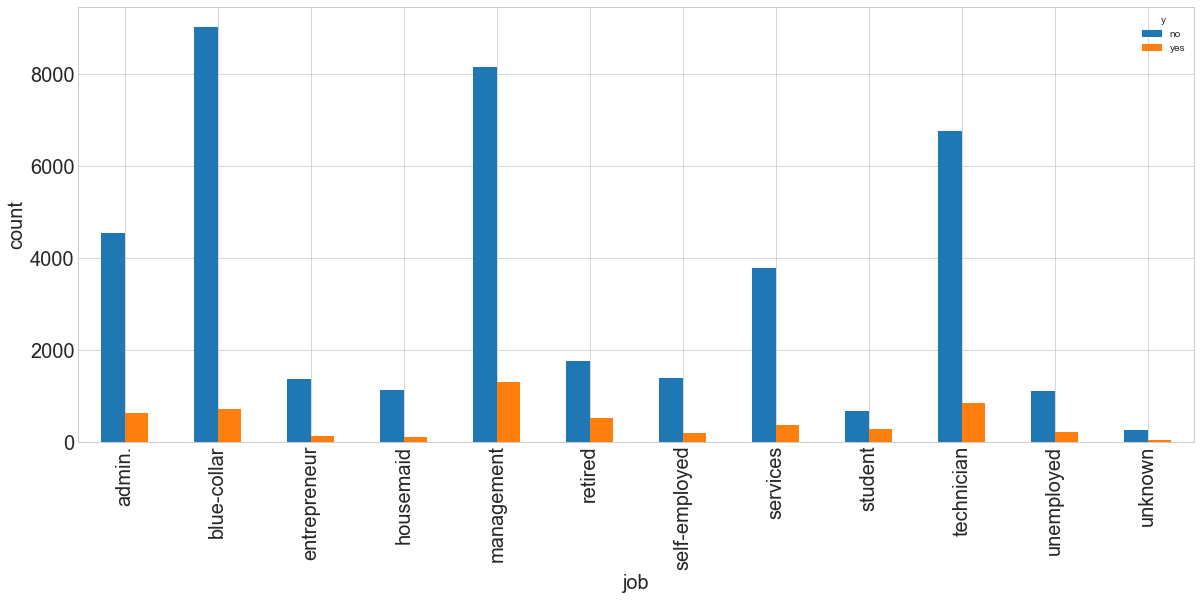

In [19]:
pd.crosstab(bank.job, dataset.y).plot(kind='bar', figsize=(20,8), fontsize=20)
plt.xlabel('job', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.show()

# Marital Status

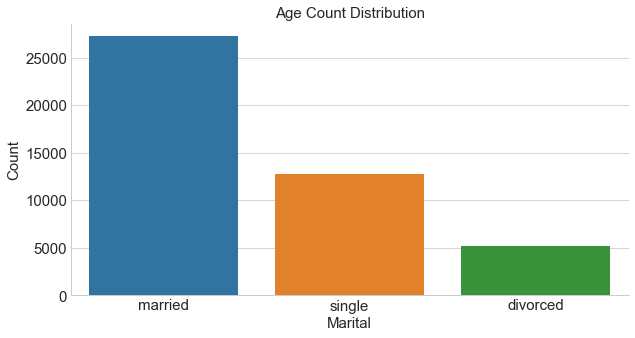

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine(left=False)  

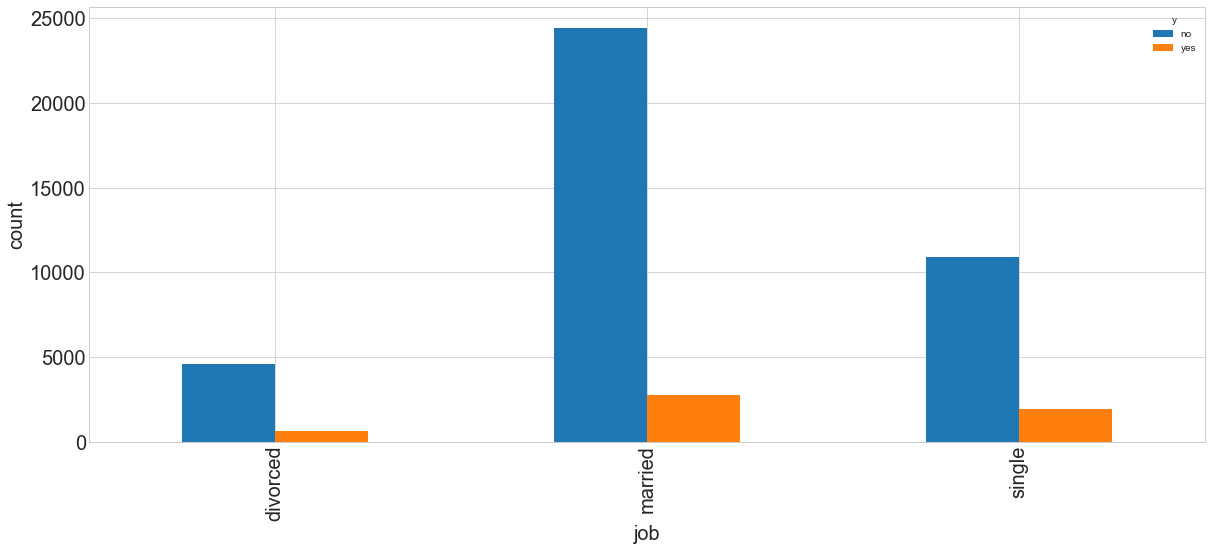

In [21]:
pd.crosstab(dataset.marital, bank.y).plot(kind='bar', figsize=(20,8), fontsize=20)
plt.xlabel('job', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.show()

# 3. Education

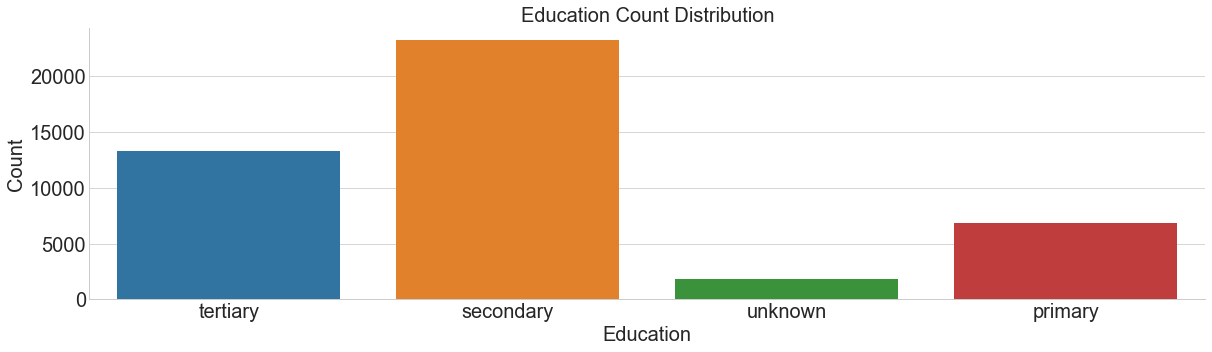

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank)
ax.set_xlabel('Education', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Education Count Distribution', fontsize=20)
ax.tick_params(labelsize=20)
sns.despine()

# 4. Default: Has a credit falls in default?

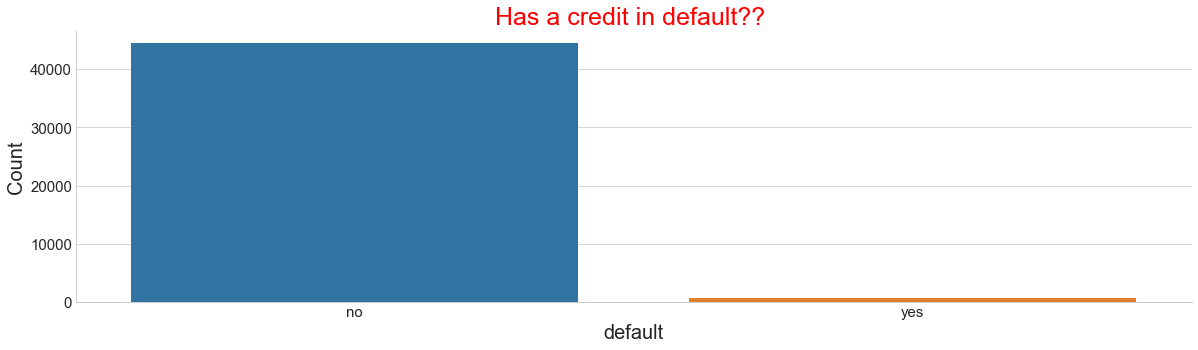

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'default', data = bank)
ax.set_xlabel('default', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Has a credit in default?? ', fontsize=25,color='red')
ax.tick_params(labelsize=15)
sns.despine()

# 5. Balance

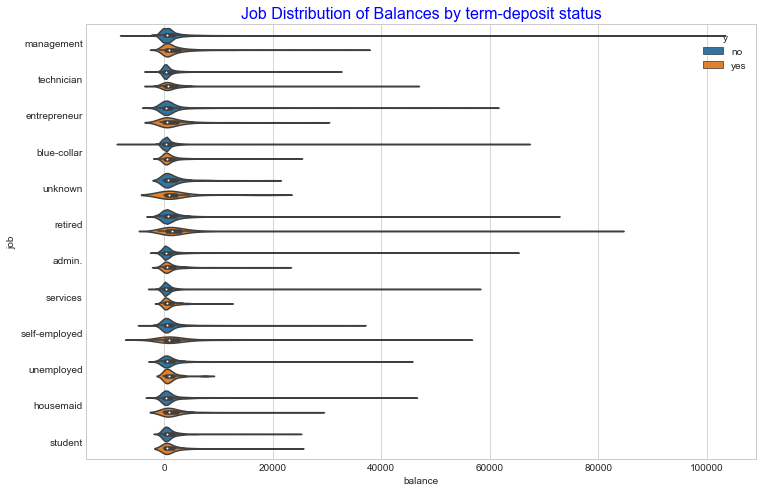

In [24]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="balance", y="job", hue="y",fontsize=12,data=bank)
plt.title("Job Distribution of Balances by term-deposit status",fontsize=16, color='blue')
plt.rcParams['font.size'] = 14
plt.show()

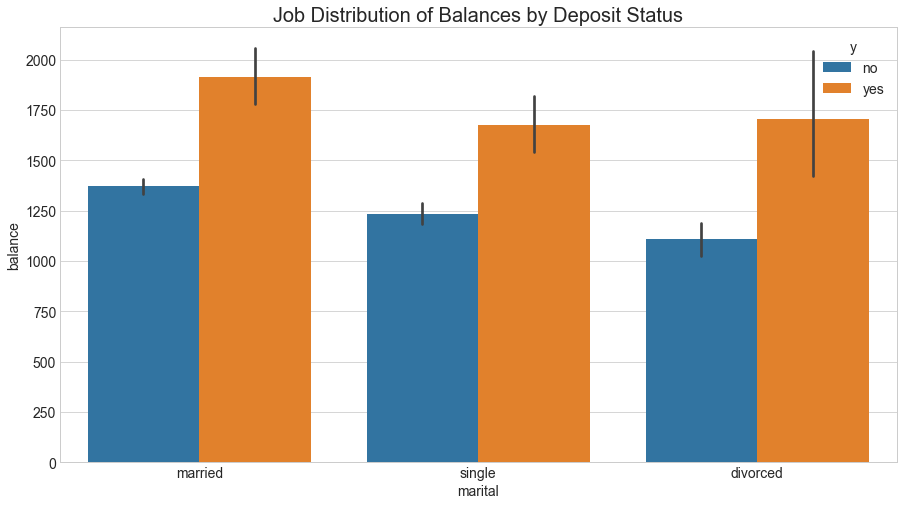

In [25]:
fig = plt.figure(figsize=(15,8))
sns.barplot(x="marital",y="balance", hue="y",data=dataset)
plt.title("Job Distribution of Balances by Deposit Status", fontsize=20)
plt.show()

# 6. Housing Loan

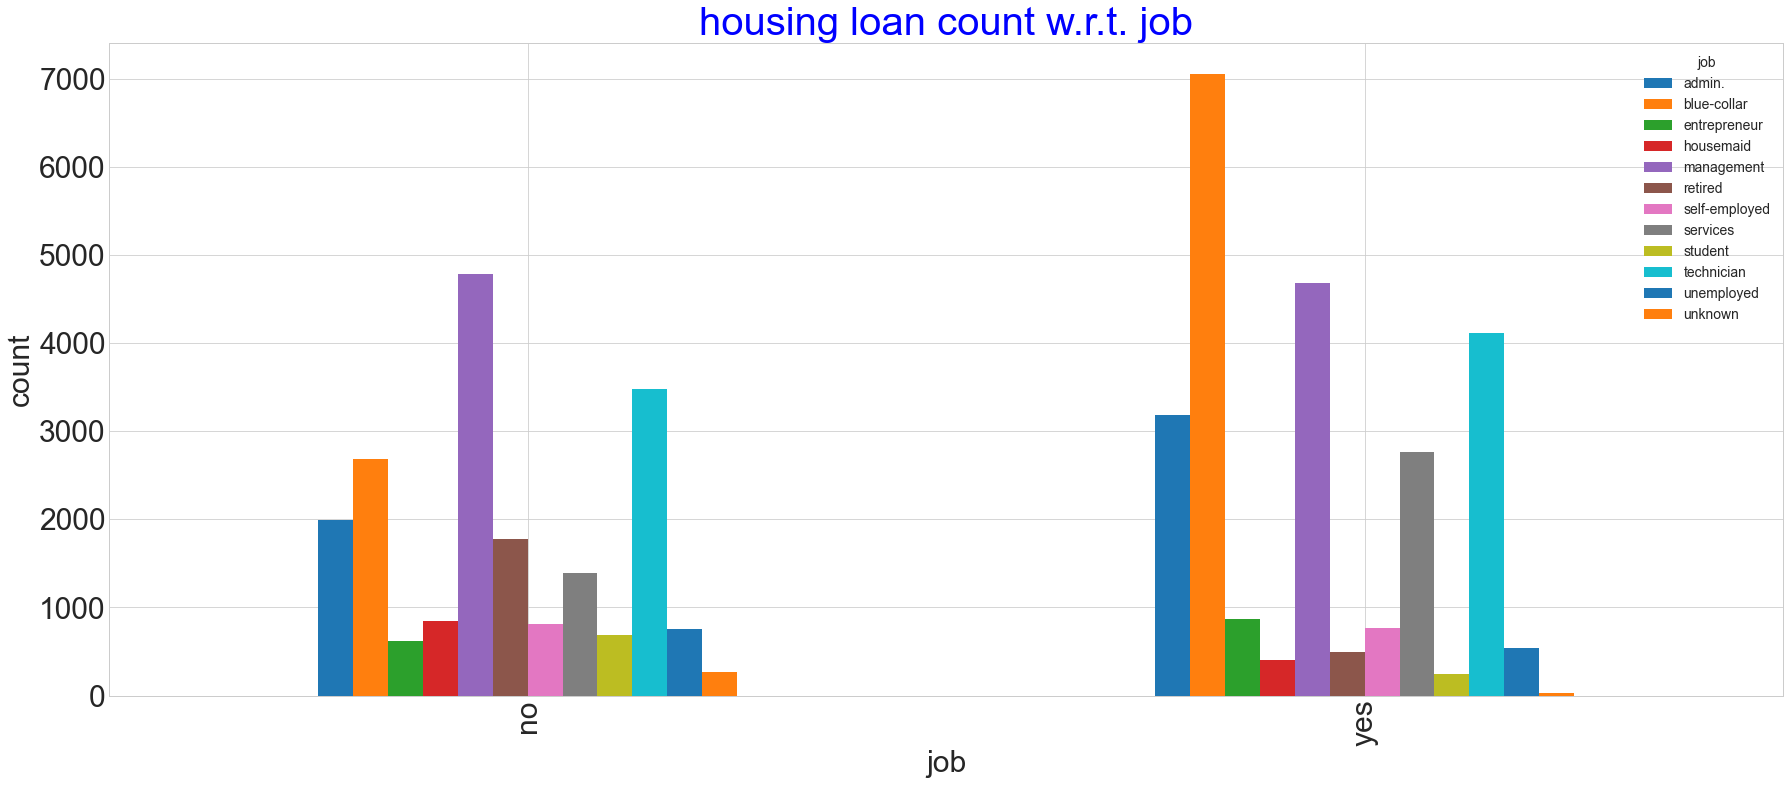

In [26]:
pd.crosstab(dataset.housing, bank.job).plot(kind='bar', figsize=(30,12), fontsize=30)
plt.xlabel('job', fontsize=30)
plt.ylabel('count', fontsize=30)
plt.title('housing loan count w.r.t. job', fontsize=40, color='blue')
plt.show()
plt.rcParams['font.size'] = 25

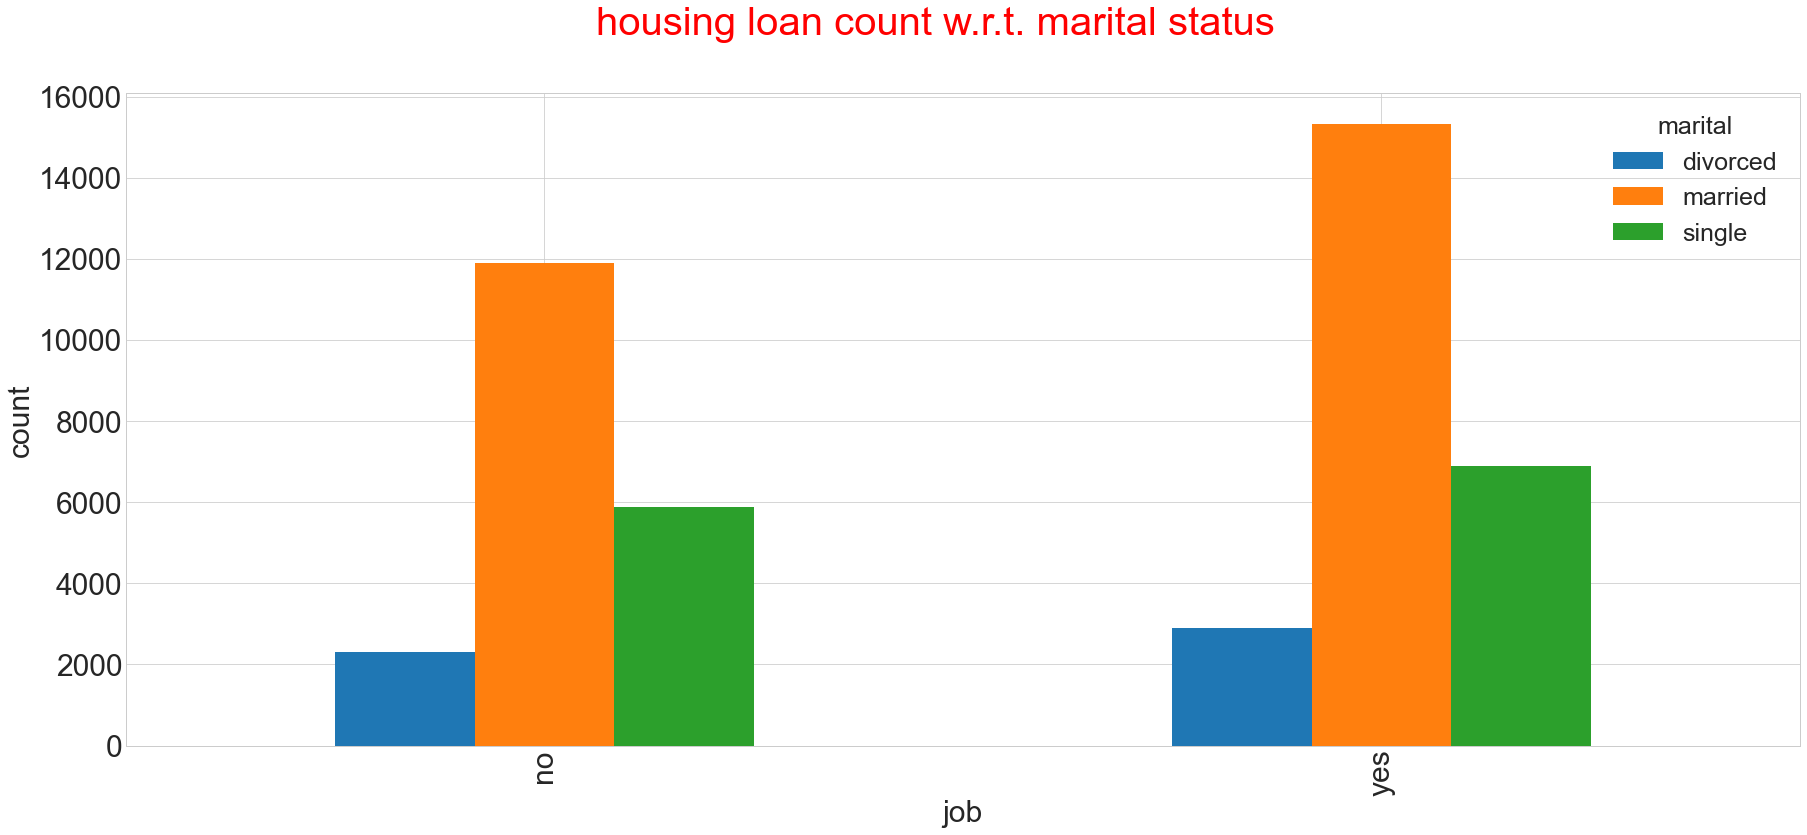

In [27]:
pd.crosstab(bank.housing, bank.marital).plot(kind='bar', figsize=(30,12), fontsize=30)
plt.xlabel('job', fontsize=30)
plt.ylabel('count', fontsize=30)
plt.suptitle('housing loan count w.r.t. marital status', fontsize=40, color='red')
plt.show()
plt.rcParams['font.size'] = 25

# 7. Personal Loan

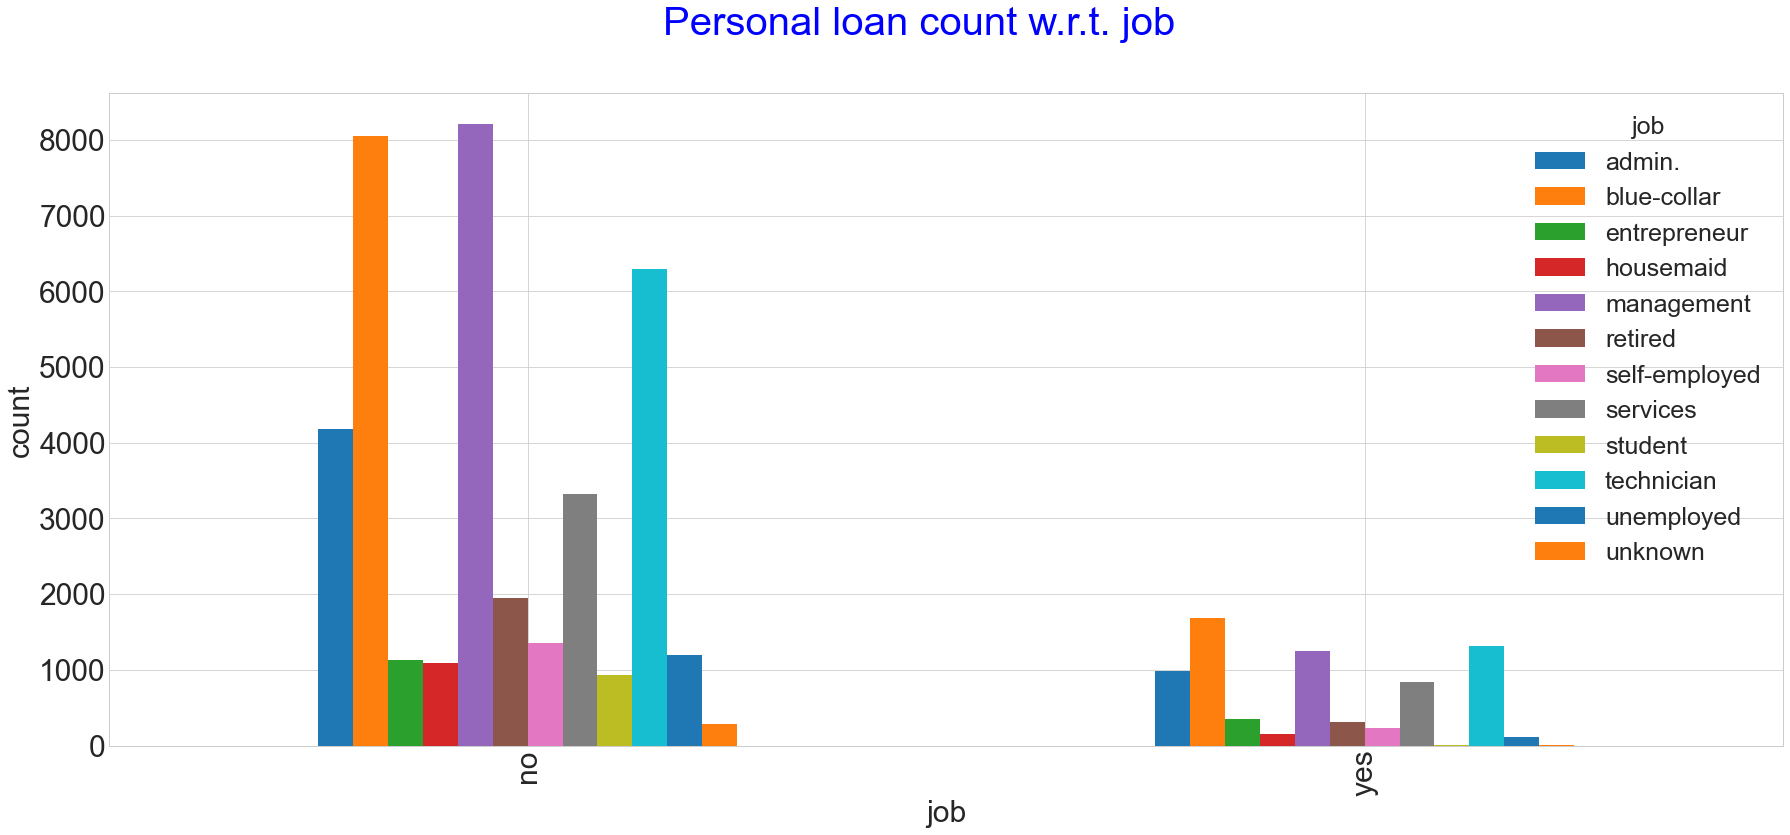

In [28]:
pd.crosstab(bank.loan, bank.job).plot(kind='bar', figsize=(30,12), fontsize=30)
plt.xlabel('job', fontsize=30)
plt.ylabel('count', fontsize=30)
plt.suptitle('Personal loan count w.r.t. job', fontsize=40, color='blue')
plt.show()
plt.rcParams['font.size'] = 25

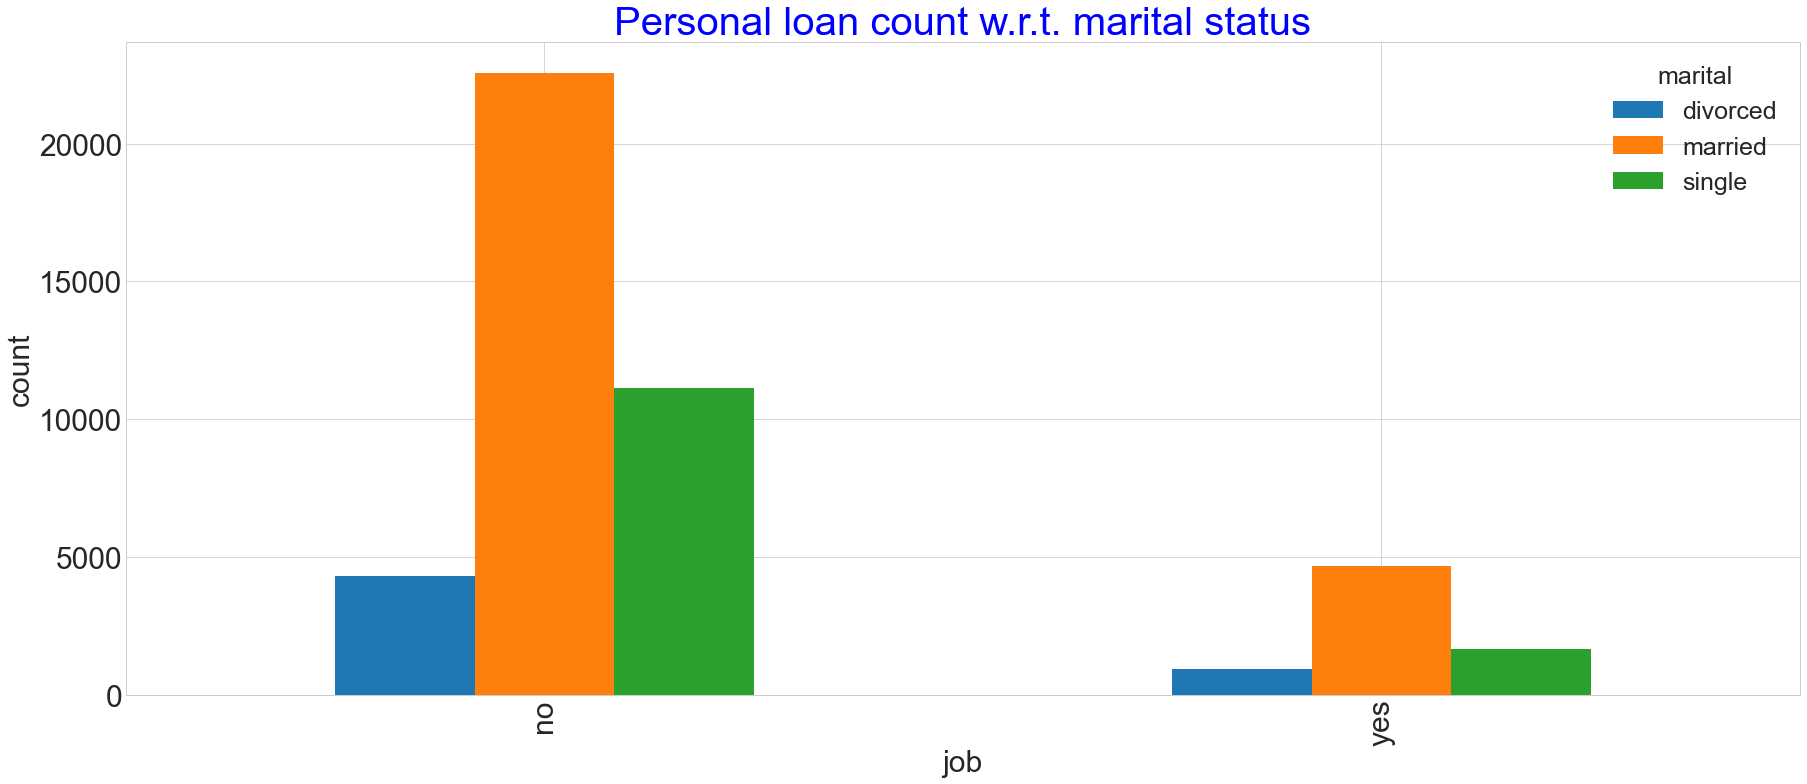

In [29]:
pd.crosstab(bank.loan, bank.marital).plot(kind='bar', figsize=(30,12), fontsize=30)
plt.xlabel('job', fontsize=30)
plt.ylabel('count', fontsize=30)
plt.title('Personal loan count w.r.t. marital status', fontsize=40, color='blue')
plt.show()
plt.rcParams['font.size'] = 25

In [30]:
client_info = bank.iloc[:, 0:8]

In [31]:
client_info.head()

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
4,33,unknown,single,unknown,no,1,no,no


In [32]:
set1 = ['age', 'job', 'marital', 'education', 'default', 'housing','loan']

In [33]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

for i in set1:
    client_info[i] = LabelEncoder.fit_transform(client_info[i])

# cross checking what values it has taken.

In [34]:
client_info.job.unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [35]:
client_info.head()

,age,job,marital,education,default,balance,housing,loan
0,40,4,1,2,0,2143,1,0
1,26,9,2,1,0,29,1,0
2,15,2,1,1,0,2,1,1
3,29,1,1,3,0,1506,1,0
4,15,11,2,3,0,1,0,0


In [36]:
client_info.drop(['age'], axis=1).head()

,job,marital,education,default,balance,housing,loan
0,4,1,2,0,2143,1,0
1,9,2,1,0,29,1,0
2,2,1,1,0,2,1,1
3,1,1,3,0,1506,1,0
4,11,2,3,0,1,0,0


In [37]:
contact_info = dataset.iloc[: , 8:12]

In [38]:
contact_info.head()

,contact,day,month,duration
0,unknown,5,may,261
1,unknown,5,may,151
2,unknown,5,may,76
3,unknown,5,may,92
4,unknown,5,may,198


In [39]:
 # Checking unique values.

contact_info.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [40]:
contact_info.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [41]:
contact_info.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [42]:
contact_info['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

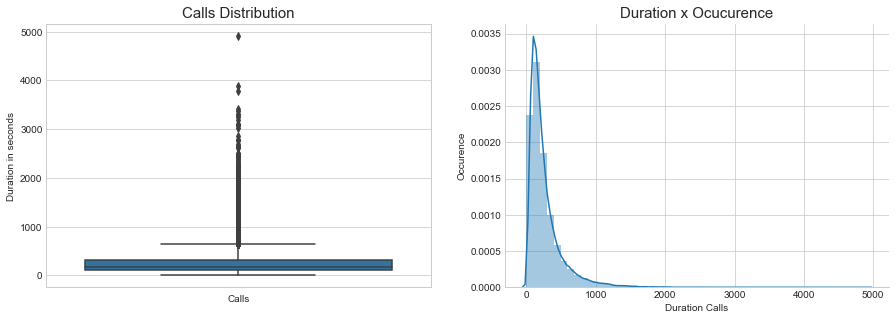

In [43]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

sns.boxplot(x = 'duration', data = contact_info, orient = 'v', ax = ax1)

ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration in seconds', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=15)
ax1.tick_params(labelsize=10)

sns.distplot(contact_info['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# The Impact of Duration Opening a Term Deposit
# we will agian using columns from main dataset since we are comparing duration with term deposit column that is 'y'

In [44]:
# first get avg. call duration

avg_duration = dataset.duration.mean()

# Now, it is better to determine 'yes' & 'no' to term deposit w.r.t. avg call duration status

dataset1 = dataset           # assigning new dataset for easy work
list = [dataset1]
dataset1['duration_status'] = np.nan     # creating new column in datatset1 & puttting nan values.

for col in list:
    col.loc[col['duration']< avg_duration, 'duration_status'] = 'below_average'
    col.loc[col['duration']> avg_duration, 'duration_status'] = 'above_average'

pct_term = pd.crosstab(dataset1['duration_status'], dataset1['y']).apply(lambda row: round(row/row.sum(), 2) * 100, axis=1)

In [45]:
# crosschecking what exactly dataset1 becomes

dataset1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_status
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,above_average
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,below_average
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,below_average
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,below_average
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,below_average


In [46]:
# checking for crosstab values.

pd.crosstab(dataset1['duration_status'], dataset1['y'])

y,no,yes
duration_status,,
above_average,11205,3827
below_average,28717,1462


In [47]:
# this is pct_term just before two code cells we have worked on it

pct_term

y,no,yes
duration_status,,
above_average,75.0,25.0
below_average,95.0,5.0


#Now, visualizing the pct_term.

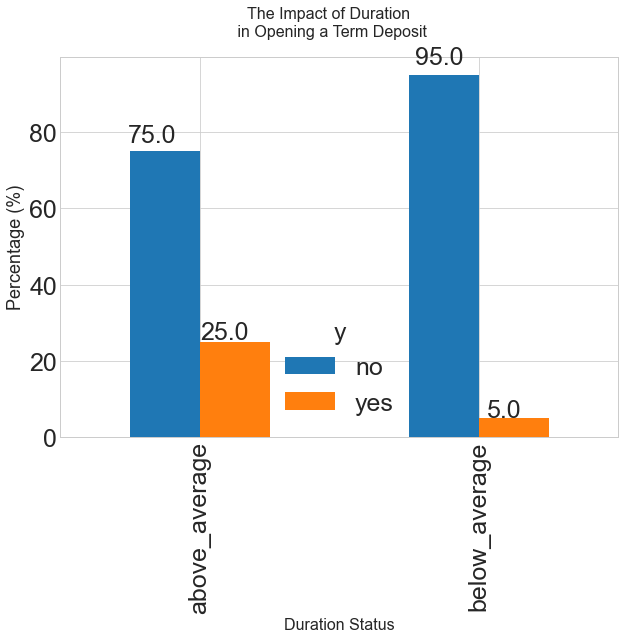

In [48]:
ax = pct_term.plot(kind='bar', figsize=(10,7))
plt.suptitle("The Impact of Duration \n in Opening a Term Deposit", fontsize=16)
plt.xlabel("Duration Status", fontsize=16);
plt.ylabel("Percentage (%)", fontsize=18)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() *1.03))
plt.show()

# Conclusion:
#It shows that when call duration is above average call duration there are more % to subscribe term deposit scheme.

#Since days are given in date format we will exclude "day" column.

In [49]:
contact_info = contact_info.drop(['day'], axis =1)

In [50]:
contact_info.head()

,contact,month,duration
0,unknown,may,261
1,unknown,may,151
2,unknown,may,76
3,unknown,may,92
4,unknown,may,198


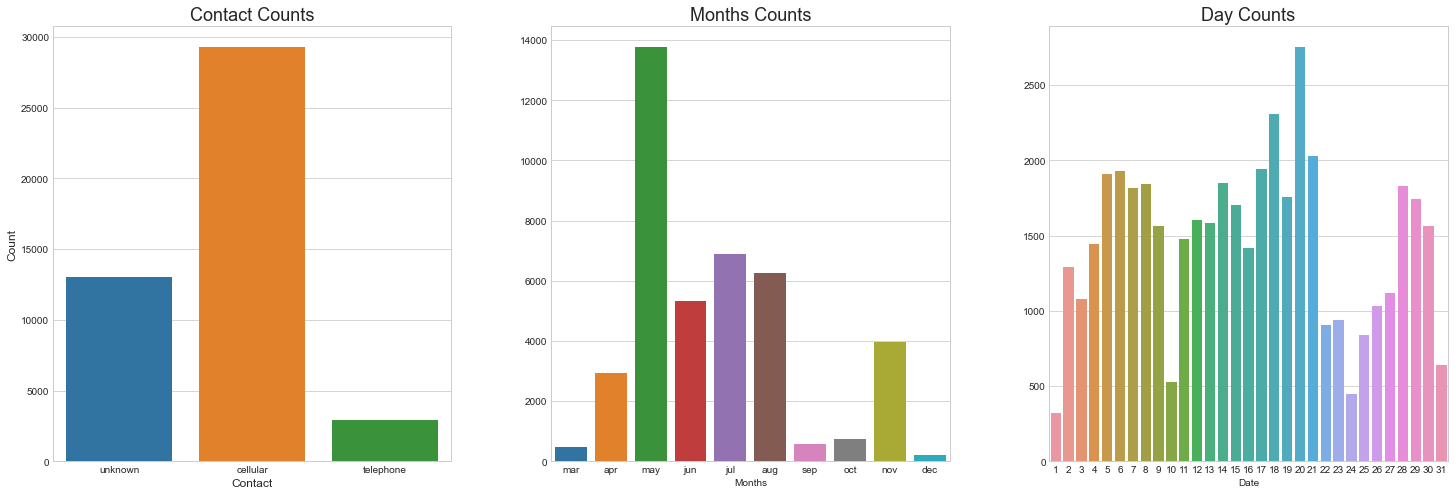

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (25,8))
sns.countplot(contact_info['contact'],ax=ax1)
ax1.set_xlabel('Contact', fontsize = 12)
ax1.set_ylabel('Count', fontsize = 12)
ax1.set_title('Contact Counts', fontsize=18)
ax1.tick_params(labelsize=10)



sns.countplot(contact_info['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts',fontsize=18)
ax2.tick_params(labelsize=10)


sns.countplot(dataset['day'], ax = ax3)
ax3.set_xlabel('Date', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day Counts',fontsize=18)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25) 
plt.show()

In [52]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

contact_info['contact'] = LabelEncoder.fit_transform(contact_info['contact'])
contact_info['month'] = LabelEncoder.fit_transform(contact_info['month'])

In [53]:
contact_info.head()

,contact,month,duration
0,2,8,261
1,2,8,151
2,2,8,76
3,2,8,92
4,2,8,198


# Since we cannot prdeict exact duration, is client had received call or not? So we will drop duration column

In [54]:
contact_info = contact_info.drop(['duration'],axis=1)

In [55]:
contact_info.head()

,contact,month
0,2,8
1,2,8
2,2,8
3,2,8
4,2,8


In [56]:
other_attributes = dataset.loc[:, ['campaign', 'pdays', 'previous', 'poutcome']]

In [57]:
other_attributes.head()

,campaign,pdays,previous,poutcome
0,1,-1,0,unknown
1,1,-1,0,unknown
2,1,-1,0,unknown
3,1,-1,0,unknown
4,1,-1,0,unknown


In [58]:
other_attributes.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [59]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder =LabelEncoder()

other_attributes['poutcome'] = LabelEncoder.fit_transform(other_attributes['poutcome'])

In [60]:
other_attributes.head()

,campaign,pdays,previous,poutcome
0,1,-1,0,3
1,1,-1,0,3
2,1,-1,0,3
3,1,-1,0,3
4,1,-1,0,3


In [61]:
final_X_dataset = pd.concat([client_info, contact_info, other_attributes],axis=1)

In [62]:
final_X_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,pdays,previous,poutcome
0,40,4,1,2,0,2143,1,0,2,8,1,-1,0,3
1,26,9,2,1,0,29,1,0,2,8,1,-1,0,3
2,15,2,1,1,0,2,1,1,2,8,1,-1,0,3
3,29,1,1,3,0,1506,1,0,2,8,1,-1,0,3
4,15,11,2,3,0,1,0,0,2,8,1,-1,0,3


In [63]:
final_Y_dataset = dataset['y']

final_Y_dataset = pd.get_dummies(final_Y_dataset, drop_first=True)

In [64]:
final_Y_dataset.head()

,yes
0,0
1,0
2,0
3,0
4,0


In [65]:
final_X_dataset.shape

(45211, 14)

In [66]:
from sklearn.model_selection import train_test_split

X1_train,X1_test, Y1_train,Y1_test = \
train_test_split(final_X_dataset, final_Y_dataset, test_size=0.3, random_state = 10)

In [68]:
!pip install imblearn

In [69]:
from imblearn.over_sampling import SMOTE
smote =SMOTE()

X1_train_smote, Y1_train_smote = smote.fit_sample(X1_train,Y1_train)

In [70]:
# cross verification..

Y1_train_smote['yes'].value_counts()

1    27916
0    27916
Name: yes, dtype: int64

# You can observe in output value counts for 0 & 1 is now equal. Hence we have balnced data.

In [71]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X1_train_smote = sc_X.fit_transform(X1_train_smote)
X1_test = sc_X.fit_transform(X1_test)

In [72]:
X1_train_smote

array([[-0.96903559,  1.53996775, -0.15679662, ...,  2.31968083,
         0.1319752 , -2.33426641],
       [-0.34413172, -1.40922585,  1.47129876, ..., -0.48872287,
        -0.3829762 ,  0.54236538],
       [ 0.10222819, -1.40922585, -0.15679662, ..., -0.48872287,
        -0.3829762 ,  0.54236538],
       ...,
       [ 0.19150017, -0.09847314, -0.15679662, ..., -0.48872287,
        -0.3829762 ,  0.54236538],
       [-0.79049163, -0.09847314, -0.15679662, ...,  0.37540135,
         3.22168362, -1.37538915],
       [-0.25485974,  1.86765593, -0.15679662, ..., -0.48872287,
        -0.3829762 ,  0.54236538]])

In [73]:
X1_test

array([[ 1.32314281,  1.42553537, -1.90681675, ..., -0.41131149,
        -0.19691139,  0.44811233],
       [-0.9439917 ,  0.50815358,  1.37667473, ..., -0.41131149,
        -0.19691139,  0.44811233],
       [-1.22738351, -0.10343428,  1.37667473, ..., -0.41131149,
        -0.19691139,  0.44811233],
       ...,
       [-0.66059988,  1.42553537,  1.37667473, ..., -0.41131149,
        -0.19691139,  0.44811233],
       [-0.18828019,  0.81394751, -0.26507101, ..., -0.41131149,
        -0.19691139,  0.44811233],
       [ 1.22867887,  1.42553537, -0.26507101, ..., -0.41131149,
        -0.19691139,  0.44811233]])

In [74]:
import statsmodels.api as sm

logit_model=sm.Logit(Y1_train_smote,X1_train_smote)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                       Results: Logit
Model:              Logit            Pseudo R-squared: inf   
Dependent Variable: yes              AIC:              inf   
Date:               2020-10-19 22:16 BIC:              inf   
No. Observations:   55832            Log-Likelihood:   -inf  
Df Model:           13               LL-Null:          0.0000
Df Residuals:       55818            LLR p-value:      1.0000
Converged:          1.0000           Scale:            1.0000
No. Iterations:     6.0000                                   
--------------------------------------------------------------
          Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
--------------------------------------------------------------
x1       -0.3315    0.0118  -28.1948  0.0000  -0.3546  -0.3085
x2       -0.0979    0.0107   -9.1367  0.0000  -0.1189  -0.0769
x3       -0.3469    0.0117  -29.6346  0.0000  -0.3698 

In [75]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X1_train_smote, Y1_train_smote)

LogisticRegression()

In [76]:
y_pred = log_reg.predict(X1_test)

In [77]:
score = log_reg.score(X1_test,Y1_test).round(2)

print('Accuracy of logistic regression classifier on indepedent dataset X is:', score)

Accuracy of logistic regression classifier on indepedent dataset X is: 0.55


In [78]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y1_test, y_pred)
print(confusion_matrix)

[[6392 5614]
 [ 453 1105]]


In [79]:
from sklearn.metrics import classification_report

print(classification_report(Y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.53      0.68     12006
           1       0.16      0.71      0.27      1558

    accuracy                           0.55     13564
   macro avg       0.55      0.62      0.47     13564
weighted avg       0.85      0.55      0.63     13564



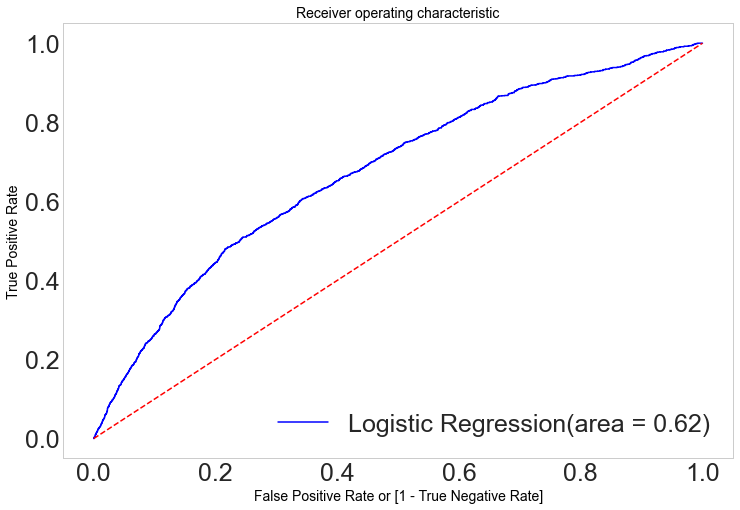

In [80]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# this will give area under curve:
logit_roc_auc = roc_auc_score(Y1_test, y_pred)   

# finding false positive ratios, true positive ratio & threshold
fpr, tpr, thresholds = roc_curve(Y1_test, log_reg.predict_proba(X1_test)[:,1])

# plotting roc curve.

plt.figure(figsize=(12,8))
plt.title('Receiver operating characteristic', color='black', fontsize=14)

plt.plot(fpr, tpr, color='blue', label='Logistic Regression(area = %0.2f)'%logit_roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate or [1 - True Negative Rate]', color='black', fontsize=14)
plt.ylabel('True Positive Rate', color='black', fontsize=14)
plt.grid()
plt.show()

# Feature Selection.

In [81]:
x = final_X_dataset
y = final_Y_dataset
print(x.shape)
print(y.shape)

(45211, 14)
(45211, 1)


In [82]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,pdays,previous,poutcome
0,40,4,1,2,0,2143,1,0,2,8,1,-1,0,3
1,26,9,2,1,0,29,1,0,2,8,1,-1,0,3
2,15,2,1,1,0,2,1,1,2,8,1,-1,0,3
3,29,1,1,3,0,1506,1,0,2,8,1,-1,0,3
4,15,11,2,3,0,1,0,0,2,8,1,-1,0,3


In [83]:
y.head()

,yes
0,0
1,0
2,0
3,0
4,0


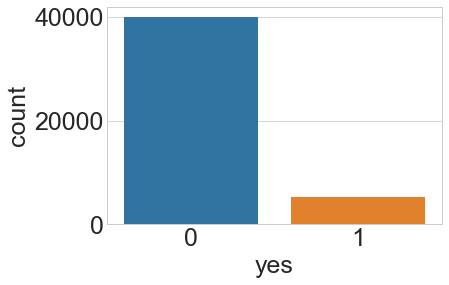

In [84]:
sns.countplot(x = 'yes', data = y)
plt.show()

In [85]:
# spliting dataset into train and test:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [86]:
# balancing data using SMOTE technique.

from imblearn.over_sampling import SMOTE
smote = SMOTE()

x_train_smote, y_train_smote = smote.fit_sample(x_train, y_train)

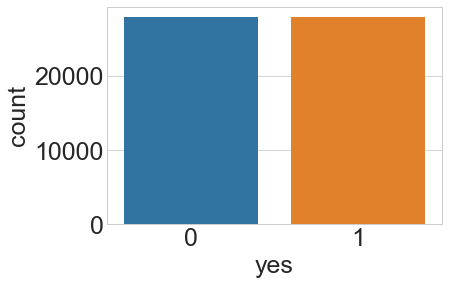

In [87]:
# checking for value counts plot after data balancing.

sns.countplot(x='yes', data = y_train_smote)
plt.show()

In [88]:
# Recursive feature elimination.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 17)                       # taking total no. of independet variables in main dataset as min features
rfe = rfe.fit(x_train_smote, y_train_smote) 

order = rfe.ranking_
order

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [89]:
variables = x_train_smote.columns
variables

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')

In [90]:
df = pd.DataFrame({'RFE_Rank': order, 'variables':variables})
df

,RFE_Rank,variables
0,1,age
1,1,job
2,1,marital
3,1,education
4,1,default
5,1,balance
6,1,housing
7,1,loan
8,1,contact
9,1,month


# Decision tree

In [91]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [92]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(x_train_smote):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for age is : 0.030515867704346607
The feature importance for job is : 0.060219067688046336
The feature importance for marital is : 0.011804508655008593
The feature importance for education is : 0.031140496940255467
The feature importance for default is : 0.0
The feature importance for balance is : 0.04886510725540488
The feature importance for housing is : 0.2649643666642174
The feature importance for loan is : 0.08804954065539985
The feature importance for contact is : 0.17411512785549396
The feature importance for month is : 0.1754655859589896
The feature importance for campaign is : 0.0349978997942198
The feature importance for pdays is : 0.015310151249060032
The feature importance for previous is : 0.006670522711537961
The feature importance for poutcome is : 0.057881756868019406


In [93]:
# creating dataframe

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

fi_df

,index,Feature,Feature Importance
0,6,housing,0.264964
1,9,month,0.175466
2,8,contact,0.174115
3,7,loan,0.088050
4,1,job,0.060219
5,13,poutcome,0.057882
6,5,balance,0.048865
7,10,campaign,0.034998
8,3,education,0.031140
9,0,age,0.030516


# Performing Logistic regression

In [95]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=10)
log_reg.fit(x_train_smote, y_train_smote)

LogisticRegression(random_state=10)

In [96]:
# predicting results using x_train_smote data

y_pred = log_reg.predict(x_train_smote)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(x_train_smote)
pred_proba

array([[0.91520371, 0.08479629],
       [0.38781236, 0.61218764],
       [0.92902847, 0.07097153],
       ...,
       [0.53893898, 0.46106102],
       [0.51745618, 0.48254382],
       [0.30904234, 0.69095766]])

In [97]:
# coef_ - Coefficient of the features in the decision function

log_reg.coef_

array([[-1.08364960e-02, -3.53444197e-02, -9.03701794e-02,
        -8.37870528e-02, -5.00933181e-02,  4.29158793e-05,
        -1.06765535e+00, -4.37448834e-01, -1.17214306e+00,
         4.93506968e-03, -2.63071000e-01,  3.67086288e-03,
         2.27934164e-01,  5.41305805e-01]])

# Evaluating the model

In [98]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(x_train_smote, y_train_smote))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(x_test, y_test))

# Classification Report
print(classification_report(y_train_smote, y_pred))

The Training Accuracy is:  0.7249069967091143
The Testing Accuracy is:  0.6726629312887054
              precision    recall  f1-score   support

           0       0.75      0.67      0.71     27956
           1       0.70      0.78      0.74     27956

    accuracy                           0.72     55912
   macro avg       0.73      0.72      0.72     55912
weighted avg       0.73      0.72      0.72     55912



In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_smote, y_pred)

array([[18823,  9133],
       [ 6248, 21708]], dtype=int64)

In [100]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':40})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

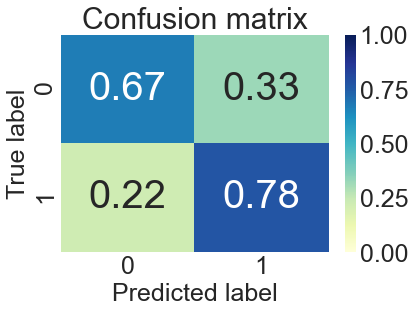

In [101]:
# Visualizing cm

cm = confusion_matrix(y_train_smote, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [102]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.67330806 0.77650594]
The Precision is: [0.75078776 0.70386823]
The False positive rate is: [0.22349406 0.32669194]
The False Negative Rate is:  [0.32669194 0.22349406]

The average TPR is: 0.7249069967091143
The average Precision is: 0.7273279950567314
The average False positive rate is: 0.27509300329088565
The average False Negative Rate is: 0.27509300329088565


In [103]:
from sklearn.metrics import log_loss

# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train_smote, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(x_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training is:  0.5458277555664702
The Log Loss on Testing Dataset is:  0.5700681922729001


# Hyper Parameter Tuning

In [104]:
np.geomspace(1e-5, 1e5, num=20)

array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

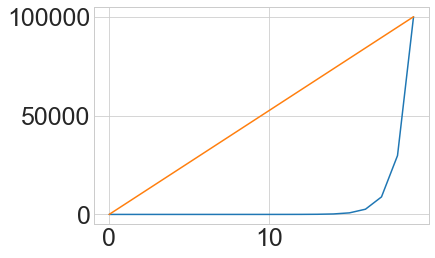

In [105]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace

In [106]:
# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(x_train_smote, y_train_smote)
    score = log_reg2.score(x_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(x_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

The CA of C parameter 1e-05 is 0.7354025361250368:
The Logg Loss of C parameter 1e-05 is 0.6469056421896127:

The CA of C parameter 3.359818286283781e-05 is 0.7058389855499853:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.6250553060265955:

The CA of C parameter 0.00011288378916846884 is 0.673400176938956:
The Logg Loss of C parameter 0.00011288378916846884 is 0.6059568081191777:

The CA of C parameter 0.000379269019073225 is 0.7085667944559128:
The Logg Loss of C parameter 0.000379269019073225 is 0.5782881620996001:

The CA of C parameter 0.0012742749857031334 is 0.6774550280153347:
The Logg Loss of C parameter 0.0012742749857031334 is 0.5915992162291505:

The CA of C parameter 0.004281332398719391 is 0.6813624299616632:
The Logg Loss of C parameter 0.004281332398719391 is 0.5899358422143512:

The CA of C parameter 0.01438449888287663 is 0.6809938071365379:
The Logg Loss of C parameter 0.01438449888287663 is 0.5858640281330526:

The CA of C parameter 0.04832930238571752 is 

In [107]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

,index,C_List,CA2,Logarithmic_Loss2
0,17,8858.667904,0.688956,0.560669
1,19,100000.000000,0.711073,0.564546
2,8,0.162378,0.664774,0.573180
3,9,0.545559,0.663005,0.578178
4,3,0.000379,0.708567,0.578288
5,14,233.572147,0.690136,0.583713
6,6,0.014384,0.680994,0.585864
7,7,0.048329,0.688145,0.586642
8,13,69.519280,0.681879,0.586657
9,18,29763.514416,0.680257,0.586916


In [108]:
# Another way of doing the above
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs')
Log_reg3.fit(x_train_smote, y_train_smote)
print("The CA is:", Log_reg3.score(x_test, y_test))
pred_proba_t = Log_reg3.predict_proba(x_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", Log_reg3.C_)

The CA is: 0.716602772043645
The Logistic Loss is:  0.5452810067226709
The optimal C parameter is:  [1.83298071]


The CA of C parameter 1e-05 is 0.7354025361250368:
The Logg Loss of C parameter 1e-05 is 0.6469056421896127:



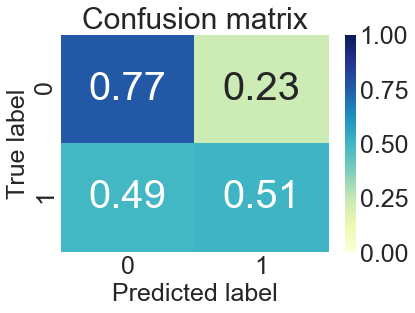

The CA of C parameter 3.359818286283781e-05 is 0.7058389855499853:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.6250553060265955:



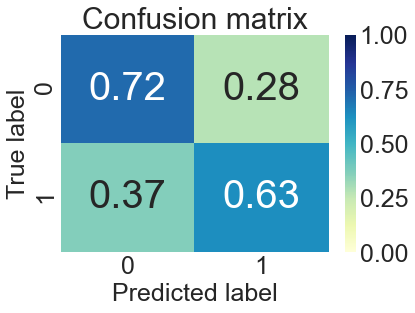

The CA of C parameter 0.00011288378916846884 is 0.673400176938956:
The Logg Loss of C parameter 0.00011288378916846884 is 0.6059568081191777:



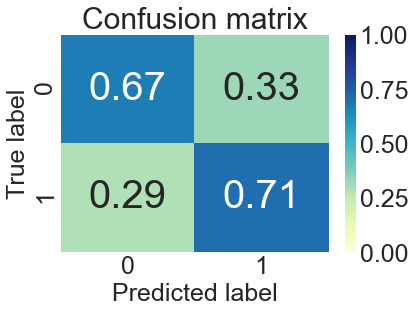

The CA of C parameter 0.000379269019073225 is 0.7085667944559128:
The Logg Loss of C parameter 0.000379269019073225 is 0.5782881620996001:



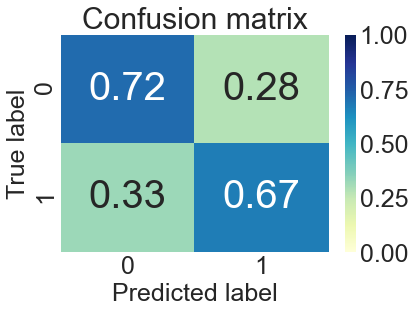

The CA of C parameter 0.0012742749857031334 is 0.6774550280153347:
The Logg Loss of C parameter 0.0012742749857031334 is 0.5915992162291505:



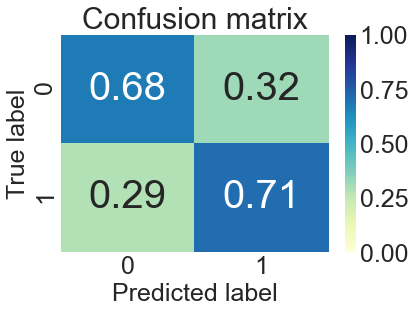

The CA of C parameter 0.004281332398719391 is 0.6813624299616632:
The Logg Loss of C parameter 0.004281332398719391 is 0.5899358422143512:



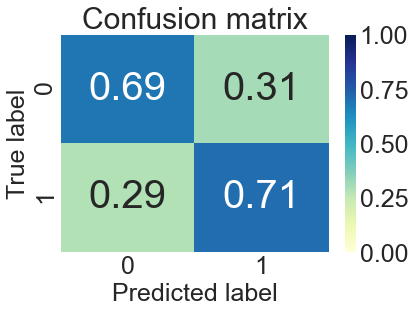

The CA of C parameter 0.01438449888287663 is 0.6809938071365379:
The Logg Loss of C parameter 0.01438449888287663 is 0.5858640281330526:



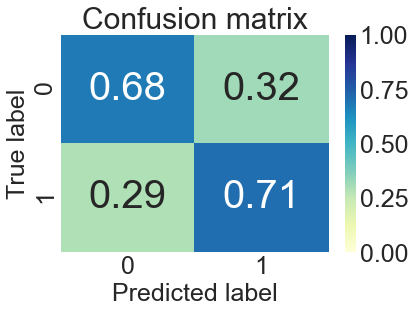

The CA of C parameter 0.04832930238571752 is 0.6881450899439693:
The Logg Loss of C parameter 0.04832930238571752 is 0.5866424740941797:



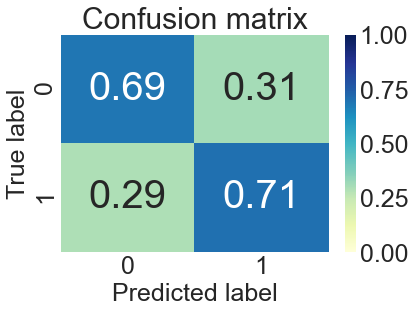

The CA of C parameter 0.1623776739188721 is 0.6647744028310233:
The Logg Loss of C parameter 0.1623776739188721 is 0.5731799227001594:



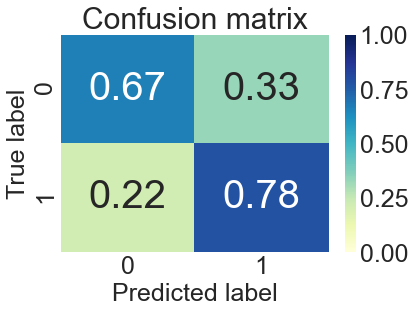

The CA of C parameter 0.5455594781168515 is 0.6630050132704217:
The Logg Loss of C parameter 0.5455594781168515 is 0.5781776619616423:



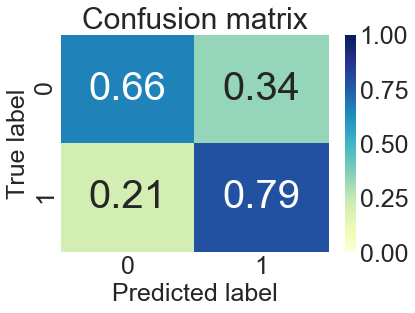

The CA of C parameter 1.8329807108324339 is 0.6653641993512238:
The Logg Loss of C parameter 1.8329807108324339 is 0.6071502537892185:



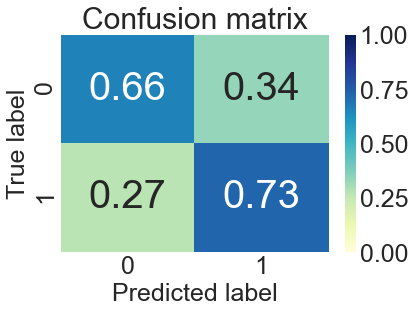

The CA of C parameter 6.1584821106602545 is 0.6290917133588911:
The Logg Loss of C parameter 6.1584821106602545 is 0.6189226020396169:



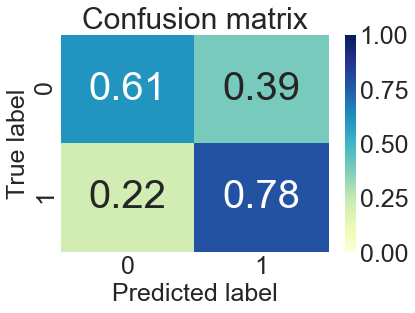

The CA of C parameter 20.6913808111479 is 0.6683131819522264:
The Logg Loss of C parameter 20.6913808111479 is 0.5966922280589357:



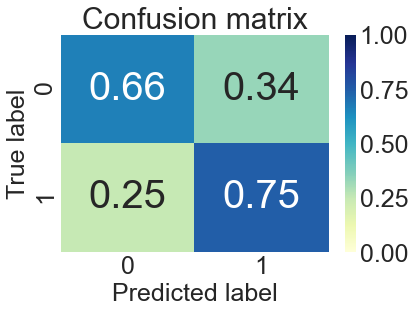

The CA of C parameter 69.51927961775606 is 0.6818785019168387:
The Logg Loss of C parameter 69.51927961775606 is 0.5866568993776637:



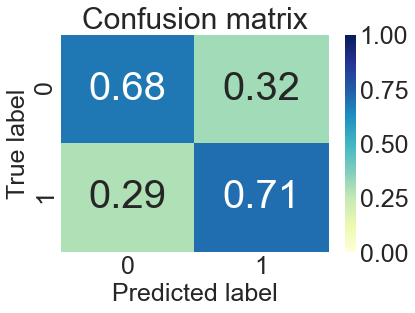

The CA of C parameter 233.57214690901213 is 0.6901356531996461:
The Logg Loss of C parameter 233.57214690901213 is 0.5837132190378387:



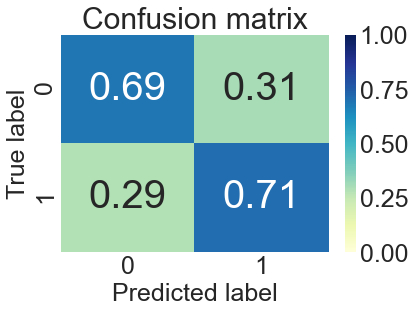

The CA of C parameter 784.7599703514607 is 0.6751695664995576:
The Logg Loss of C parameter 784.7599703514607 is 0.5909654300057181:



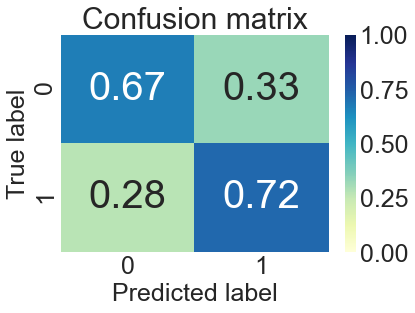

The CA of C parameter 2636.6508987303555 is 0.6756119138897081:
The Logg Loss of C parameter 2636.6508987303555 is 0.5934513533235035:



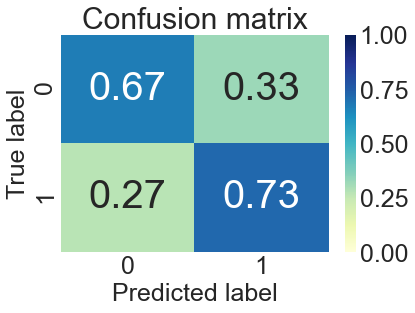

The CA of C parameter 8858.667904100832 is 0.688956060159245:
The Logg Loss of C parameter 8858.667904100832 is 0.5606692233071793:



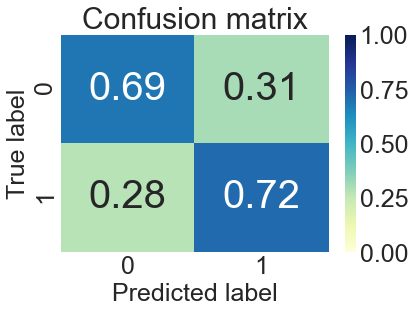

The CA of C parameter 29763.51441631313 is 0.6802565614862872:
The Logg Loss of C parameter 29763.51441631313 is 0.5869161732537713:



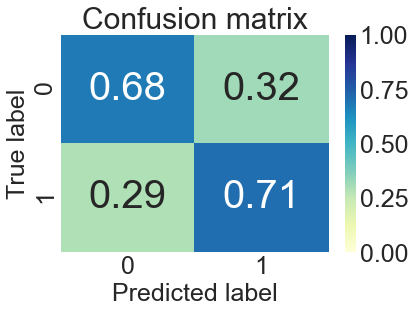

The CA of C parameter 100000.0 is 0.711073429666765:
The Logg Loss of C parameter 100000.0 is 0.5645459722676689:



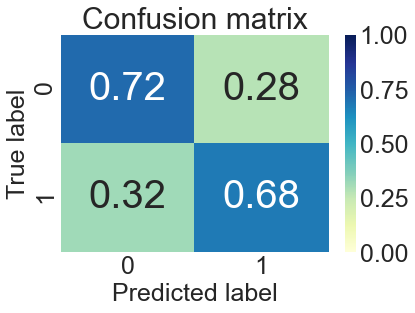

In [109]:

# Maybe we have a different metric we want to track

# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(x_train_smote, y_train_smote)
    score = log_reg2.score(x_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(x_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")
    
    y_pred = log_reg2.predict(x_train_smote)
    cm = confusion_matrix(y_train_smote, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
    plt.show()

# Final Model With selected parameters

In [110]:
# Final Model 

log_reg3 = LogisticRegression(random_state=10, solver = 'lbfgs', C=784.759970)
log_reg3.fit(x_train_smote, y_train_smote)
score = log_reg3.score(x_test, y_test)

pred_proba_t = log_reg3.predict_proba(x_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

Testing Acc: 0.6650693010911236
Log Loss: 0.6023183366847014
